In [939]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [940]:
with open("simu5_data/simu5_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 100]
# df_test = df_test.loc[df_test.session < 100]

In [941]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,list,session
0,1071,857,PIMPLE,MAILBOX,0,0
1,309,1029,CIGARETTE,PAW,0,0
2,624,700,GARLIC,HEEL,0,0
3,195,1389,BULLETIN,STRANGER,0,0
4,580,392,FLIPPER,COUSIN,0,0
...,...,...,...,...,...,...
467995,1281,1100,SHELL,POLYESTER,77,999
467996,1511,421,TROUT,CUCUMBER,77,999
467997,1269,640,SERGEANT,GLASSES,77,999
467998,1495,1017,TRAITOR,PARTNER,77,999


In [942]:
df_test

,test_itemno,test_item,correct_ans,lag,list,session
0,580,FLIPPER,392,1,0,0
1,744,IRON,245,3,1,0
2,316,CLAMP,958,5,2,0
3,109,BEAVER,1326,2,3,0
4,768,KANGAROO,1632,0,4,0
...,...,...,...,...,...,...
77995,129,BIRD,67,4,73,999
77996,616,FURNITURE,1451,5,74,999
77997,1082,PLANET,344,4,75,999
77998,100,BATHTUB,192,5,76,999


### Run CMR-IA

In [943]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [944]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.60,  # 0.50
    beta_cue = 0.60,  # 0.45
    beta_distract = 0.1,
    beta_rec_post = 0.99,
    gamma_fc = 0.8,  # 0.7
    gamma_cf = 0.5,  # has effect on omax_fin?
    s_fc = 0.1,
    s_cf = 0.1,
    c_thresh = 0.01,
    kappa = 0.08,
    lamb = 0.05,
    eta = 0.02,
    phi_s = 0.4,  # control the overall f_dif correct， 1.6
    phi_d = 1.45,  # control the curve of last three, higher then upper, mediated by phi_s, 1.1
    nitems_in_accumulator = 48,
    d_ass = 0,
    alpha = 0.5,
    use_new_context = True,
)
params

{'beta_enc': 0.6,
 'beta_rec': 0.5,
 'beta_cue': 0.6,
 'beta_rec_post': 0.99,
 'beta_distract': 0.1,
 'phi_s': 0.4,
 'phi_d': 1.45,
 's_cf': 0.1,
 's_fc': 0.1,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 5,
 'alpha': 0.5,
 'c_thresh': 0.01,
 'c_thresh_itm': 0.5,
 'c_thresh_ass': 0.5,
 'd_ass': 0,
 'lamb': 0.05,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 48,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.8,
 'gamma_cf': 0.5,
 'use_new_context': True}

In [945]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 2419.08683013916


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,580,1605.0,1420.0,0.887542
1,1,0,744,245.0,2510.0,0.870246
2,2,0,316,1583.0,2120.0,0.797534
3,3,0,109,1326.0,2880.0,0.900244
4,4,0,768,1632.0,2050.0,0.967616
...,...,...,...,...,...,...
77995,73,999,129,67.0,3970.0,0.852012
77996,74,999,616,119.0,3680.0,0.741838
77997,75,999,1082,-1.0,-1.0,-1.000000
77998,76,999,100,688.0,4300.0,0.819364


In [946]:
df_simu = df_simu.merge(df_test,on=['session','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list_x,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,list_y,correct
0,0,0,580,1605.0,1420.0,0.887542,FLIPPER,392,1,0,False
1,1,0,744,245.0,2510.0,0.870246,IRON,245,3,1,True
2,2,0,316,1583.0,2120.0,0.797534,CLAMP,958,5,2,False
3,3,0,109,1326.0,2880.0,0.900244,BEAVER,1326,2,3,True
4,4,0,768,1632.0,2050.0,0.967616,KANGAROO,1632,0,4,True
...,...,...,...,...,...,...,...,...,...,...,...
77995,73,999,129,67.0,3970.0,0.852012,BIRD,67,4,73,True
77996,74,999,616,119.0,3680.0,0.741838,FURNITURE,1451,5,74,False
77997,75,999,1082,-1.0,-1.0,-1.000000,PLANET,344,4,75,False
77998,76,999,100,688.0,4300.0,0.819364,BATHTUB,192,5,76,False


In [947]:
# f_in

In [948]:
sessions = df_simu.session.to_numpy()
for sess in sessions:
    df_tmp = df_study.loc[df_study.session == sess]
    tmp1 = df_tmp.study_itemno1.to_numpy()
    tmp2 = df_tmp.study_itemno2.to_numpy()
    tmp = np.concatenate((tmp1, tmp2))
    tmp = np.sort(tmp)

    this_df = df_simu.query(f"session=={sess}")
    testid = np.searchsorted(tmp, this_df.test_itemno)
    corrid = np.searchsorted(tmp, this_df.correct_ans)

    df_simu.loc[df_simu.session == sess, 'corr_fin'] = [f_dif[sess][l][i] for l,i in enumerate(corrid)]
    df_simu.loc[df_simu.session == sess, 'omax_fin'] = [np.delete(f_dif[sess][l], i).max() for l,i in enumerate(corrid)]

df_simu

,list_x,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,list_y,correct,corr_fin,omax_fin
0,0,0,580,1605.0,1420.0,0.887542,FLIPPER,392,1,0,False,-0.232029,-0.270197
1,1,0,744,245.0,2510.0,0.870246,IRON,245,3,1,True,-0.319075,-0.307417
2,2,0,316,1583.0,2120.0,0.797534,CLAMP,958,5,2,False,-0.417943,-0.318968
3,3,0,109,1326.0,2880.0,0.900244,BEAVER,1326,2,3,True,-0.311040,-0.261474
4,4,0,768,1632.0,2050.0,0.967616,KANGAROO,1632,0,4,True,-0.209064,-0.381908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77995,73,999,129,67.0,3970.0,0.852012,BIRD,67,4,73,True,-0.280227,-0.323287
77996,74,999,616,119.0,3680.0,0.741838,FURNITURE,1451,5,74,False,-0.334681,-0.277235
77997,75,999,1082,-1.0,-1.0,-1.000000,PLANET,344,4,75,False,-0.301279,-0.282124
77998,76,999,100,688.0,4300.0,0.819364,BATHTUB,192,5,76,False,-0.273925,-0.318763


In [949]:
df_simu.to_pickle("simu5_data/simu5_result.pkl")

### PLOT

In [950]:
with open("simu5_data/simu5_result.pkl", 'rb') as inp:
    df_simu = pickle.load(inp)

In [951]:
df_fin = df_simu.groupby('lag')[['corr_fin','omax_fin']].mean().reset_index()
df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
df_fin

,lag,corr_fin,omax_fin,dif
0,0,-0.203279,-0.354686,0.151407
1,1,-0.238977,-0.294046,0.055069
2,2,-0.272388,-0.298536,0.026148
3,3,-0.303460,-0.304206,0.000746
4,4,-0.331752,-0.310346,-0.021406
5,5,-0.340305,-0.317284,-0.023021


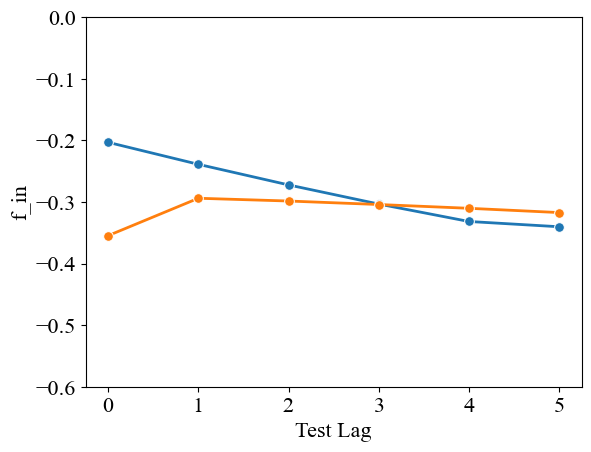

In [952]:
sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
plt.ylim([-0.6,0])
plt.xlabel('Test Lag')
plt.ylabel('f_in')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

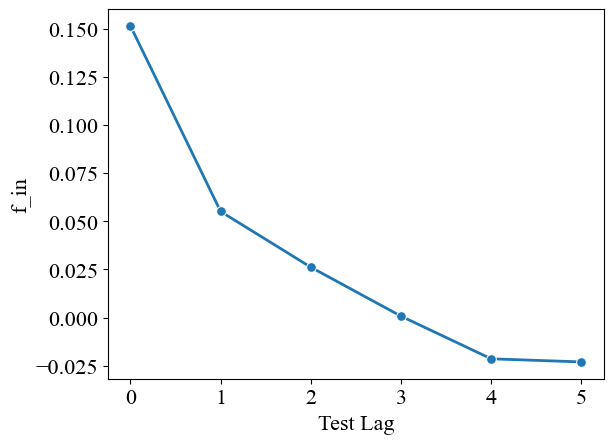

In [953]:
sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('f_in')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

In [954]:
df_laggp = df_simu.groupby(['lag']).correct.mean().to_frame(name='corr_rate').reset_index()
df_laggp

,lag,corr_rate
0,0,0.816999
1,1,0.522791
2,2,0.391176
3,3,0.297301
4,4,0.241860
5,5,0.249070


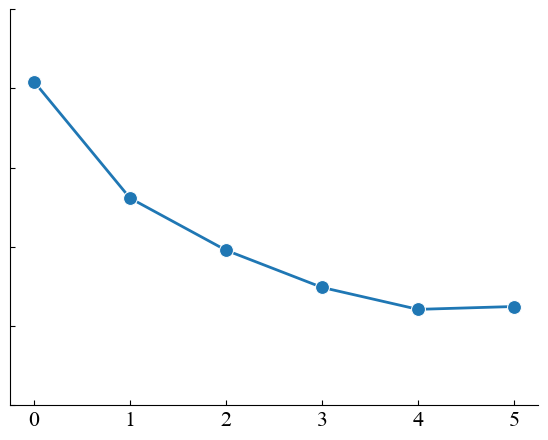

In [956]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp, x='lag', y='corr_rate', linewidth=2, marker='o', markersize = 10)
plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('Probablility of Recall')
ax.set(xlabel=None, ylabel=None)
plt.tick_params(labelleft=False)

plt.savefig('simu5_fig/simu5_recall.pdf')
plt.show()